In [ ]:
# # Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install numpy

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### 1. Channel Swapping

#### Detail: Read the image and change RGB in order of BGR.
It is possible to extract the red component of the image with the following code. 

<b>Note that in the cv2.imread() and cv2.imshow() function the channel will be in order of BGR!</b>


The variable red contains only the red component of 'imori.jpg'.

<b>in the channel order of plt.imshow() function is GRB! </b>

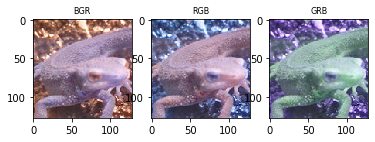

In [2]:
img = cv2.imread("Dataset/others/imori.jpg")
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_BGR = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2BGR)

plt.subplot(1,3,1)
plt.imshow(img_BGR)
plt.title("BGR", fontsize=8)

plt.subplot(1,3,2)
plt.imshow(img_RGB)
plt.title("RGB", fontsize=8)

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

img_GRB = img.copy()
img_GRB[:,:,0] = g.copy()
img_GRB[:,:,1] = r.copy()
img_GRB[:, :, 2] = b.copy()
plt.subplot(1,3,3)
plt.imshow(img_GRB)
plt.title("GRB", fontsize=8)
plt.show()

### 2. Grayscale

#### Detail: Make the image grayscale
Grayscale is a kind of image luminance expression method and is calculated by the following formula. 
> $$ Y=0.2126R + 0.7152G + 0.0722B $$

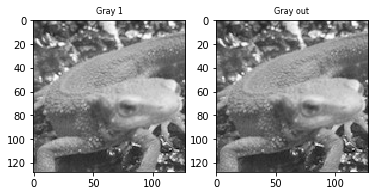

In [3]:
img = cv2.imread("Dataset/others/imori.jpg")

img_origion = img.copy()
img = img.astype(np.float)
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Grayscale
gray = cv2.cvtColor(img_origion, cv2.COLOR_BGR2GRAY)
gray_RGB = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(gray_RGB)
plt.title("Gray 1", fontsize=8)

out = 0.2126*r + 0.7125*g + 0.0722*b
out = out.astype(np.uint8)

gray_out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,2)
plt.imshow(gray_out)
plt.title("Gray out", fontsize=8)
plt.show()

### 3. Binarization
Binarize the image. Binarization is a method of expressing images as binary black and white. Herem the threshold is set to 128 in gray scale and binarized by the following equation.

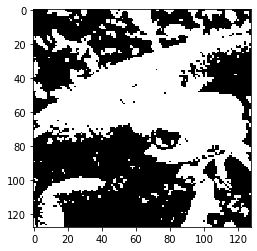

In [4]:
img = cv2.imread("Dataset/others/imori.jpg")

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Grayscale
out = 0.2126*r + 0.7152*g + 0.0722*b
out = out.astype(np.uint8)

# Brnarization
th = 128
out[out < th] = 0
out[out >= th] = 255

out_RGB = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.imshow(out_RGB)
plt.show()

### 4. Binarization of Otsu
**Detail: Implement Otsu's binarization**
Otsu's binarization is called a discriminant analysis method, and it is a method to automatically determine the separation threshold in binarization. This is calculated from the ratio **between intra-class variance** and **interclass variance**.
<ul>
    <li>Less than the threshold t is class 0, and equal or more than t is class 1.</li>
    <li>$w_0$,$w_1$: The ratio of the number of pixels of each class sqperated by the threshold t ($w_0 + w_1 = 1$ is satisfied)</li>
    <li>$s_{0}^2$, $s_{1}^2$: Distribution of pixel values of each class</li>
    <li>$M_0$, $M_1$: average value of pixel values of each class</li>
</ul>

> Within-class variance: $$S_{w}^2 = w_{0}^2 + w_1 * S_{1}^2$$

> Interclass variance: $$S_{b}^2 = w_0 * (M_0 - M_t)^2 + w_1 * (M_1 -M_t)^2 = w_0 * w_1 * (M_0 - M_1)^2$$

> Distribution of pixels of the whole image $$S_{t}^2 = S_{w}^2 + S_{b}^2 = (const)$$

> The degree of separation is defined by the following equation. $$X = S_{b}^2/ S_{w}^2 = S_{b}^2/(S_{t}^2 - S_{b}^2)$$

> Therefore:

> $$argmax_{t} X = argmax_{t} S_{b}^2$$
> That is the threshold value t that satisfies $S_{b}^2 = w_0 * w_1 * (M_0 - M_1)^2$ may be used as the binarization threshold

threshold >> 127


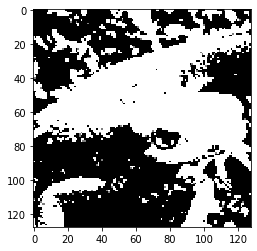

In [5]:
img = cv2.imread("Dataset/others/imori.jpg")  
H, W, C = img.shape

# Grayscale
out = 0.2126*img[...,2]+0.7152*img[...,1]+0.0722*img[...,0]
out = out.astype(np.uint8)

# Determine threshold of Otsu's binarization
max_sigma = 0
max_t = 0

for _t in range(1, 255):
    v0 = out[np.where(out<_t)]
    m0 = np.mean(v0) if len(v0)>0 else 0
    w0 = len(v0) / (H * W)
    v1 = out[np.where(out>=_t)]
    m1 = np.mean(v1) if len(v1)>0 else 0
    w1 = len(v1) / (H * W)
    sigma = w0 * w1 * ((m0-m1)**2)

    if sigma > max_sigma:
        max_sigma = sigma
        max_t = _t
# Binarization
print("threshold >>", max_t)
th = max_t
out[out < th] = 0
out[out > th] = 255

# Print image
out_RGB = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.imshow(out_RGB)
plt.show()
    

### 5. HSV Conversion

HSV conversion is a method of expressing colors by Hue(色相), Saturation(彩度), Value(明度).
- Hue:
    - Expresses the color tone from 0 to 360 degrees.
    - Indicates the kind of color such as red or blue. (0 <= H <360)
- Saturation: Color vividness.
    - When the Saturation is low, the grayness becomes conspicuous and it becomes a dull color. (0 <= S < 1)
- Value: Brightness of color.
    - The higher the Value, the closer to white
    - The lower the Value, the closer to black. (0 <=V <1)

The RGB -> HSV conversion is defined by the following equation.
```bash
Max = max(R,G,B)
Min = min(R,G,B)
H = { 0                      (if Min = Max)
      60 * (G-R) / (Max-Min) + 60  (if Min=B)
      60 * (B-G) / (Max-Min) + 180 (if Min=R)
      60 * (R-B) / (Max-Min) + 300 (if Min=G)
    }
V = Max
S = Max - Min
```
HSV -> RGB conversion is defined by the following equation.
```bash
C = S
H_1 = H//60
X = C * (1 - abs(H_1 % 2 - 1))
(R,G,B) = (V-C) * (1,1,1) + {(0,0,0) (if H is undefined)
                             (C,X,0) (if 0 <= H_1 < 1)
                             (X,C,0) (if 1 <= H_1 < 2)
                             (0,C,X) (if 2 <= H_1 < 3)
                             (0,X,C) (if 3 <= H_1 < 4)
                             (X,0,C) (if 4 <= H_1 < 5)
                             (C,0,X) (if 5 <= H_1 < 6)}
```

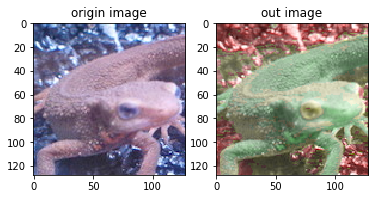

In [6]:
img = cv2.imread("Dataset/others/imori.jpg")
img_origin = img.copy()
img = img.astype(np.float32) / 255.

# RGB > HSV
out = np.zeros_like(img)
# img: [128,128,3]
max_v = np.max(img, axis=2).copy() # [128,128]
min_v = np.min(img, axis=2).copy() # [128,128]
min_arg = np.argmin(img, axis=2) # [128,128]

H = np.zeros_like(max_v)

H[np.where(max_v == min_v)] = 0
# if min == B
ind = np.where(min_arg == 0)
H[ind] = 60 * (img[..., 1][ind] - img[...,2][ind]) / (max_v[ind] - min_v[ind]) + 60
# # if min == R
ind = np.where(min_arg == 2)
H[ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
# # if min == G
ind = np.where(min_arg == 1)
H[ind] = 60 * (img[...,2][ind] - img[...,0][ind]) / (max_v[ind] - min_v[ind]) + 300

V = max_v.copy()
S = max_v.copy() - min_v.copy()

# Transpos Hue
H = (H + 180) % 360 # [128,128]

# HSV > GRB
C = S
H_ = H // 60 
X = C * (1 - np.abs( H_ % 2 - 1))
Z = np.zeros_like(H)

vals = [[Z,X,C], [Z,C,X], [X,C,Z], [C,X,Z], [C,Z,X], [X,Z,C]]

for i in range(6):
    ind = np.where((i <= H_) & (H_ < (i+1)))
    out[..., 0][ind] = (V-C)[ind] + vals[i][0][ind]
    out[..., 1][ind] = (V-C)[ind] + vals[i][1][ind]
    out[..., 2][ind] = (V-C)[ind] + vals[i][2][ind]

out[np.where(max_v == min_v)] = 0
out = (out * 255).astype(np.uint8)

# Save result
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title("origin image")
plt.subplot(1,2,2)
plt.title("out image")
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

### 6. Discretization of Color

**Detail:**
Decrease the value of the image from $256^3$ to $4^3$. That is, to each of the values R, G, B in {32, 96, 160, 224}. This is a quantization operation For each value, it is defined as follows.
```bash
    val = { 32 ( 0 <= val < 63)
            96 ( 63 <= val < 127)
           160 ( 127 <= val < 191)
           224 ( 191 <= val < 256)}
```

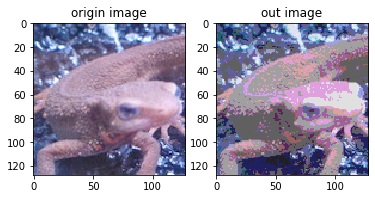

In [7]:
img = cv2.imread("Dataset/others/imori.jpg")
# Decrease color
out = img.copy()

for i in range(4):
    ind = np.where(((64*i-1) <= out)&(out<(64*(i+1)-1)))
    out[ind] = 32 * (2*i+1)
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('origin image')
plt.subplot(1,2,2)
plt.title('out image')
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.show()

### 7. Average Pooling

In this case, the image is divided into grids (divide it into certain fixed-length regions), and the value in the region is filled with the average value in the region (cell). The operation of dividing the grid in this way and **obtaining** the representative value in that area is called **pooling**. These pooling operations play an important role in **CNN (Convolutional Neural Network)**. 
This is defined by the following equation.
```bash
v = 1/|R| * Sum_{i in R} v_i
```

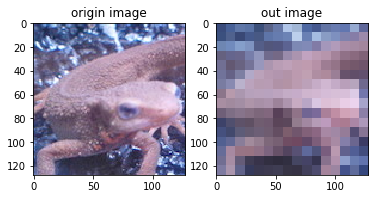

In [8]:
img = cv2.imread("Dataset/others/imori.jpg")

# Average Pooling
out = img.copy()

H, W, C = img.shape
G = 8
Nh = int(H/G)
Nw = int(W/G)

for y in range(Nh):
    for x in range(Nw):
        for c in range(C):
            out[G*y:G*(y+1),G*x:G*(x+1),c] = np.mean(out[G*y:G*(y+1),G*x:G*(x+1),c]).astype(np.int)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('origin image')
plt.subplot(1,2,2)
plt.title('out image')
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.show()

### 8. Max Pooling

Pooling with the maximum value instead of the average value.

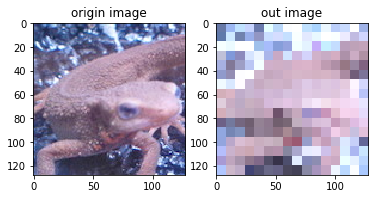

In [9]:
img = cv2.imread("Dataset/others/imori.jpg")

# max Pooling
out = img.copy()

H, W, C = img.shape
G = 8
Nh = int(H/G)
Nw = int(W/G)

for y in range(Nh):
    for x in range(Nw):
        for c in range(C):
            out[G*y:G*(y+1),G*x:G*(x+1),c] = np.max(out[G*y:G*(y+1),G*x:G*(x+1),c]).astype(np.int)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('origin image')
plt.subplot(1,2,2)
plt.title('out image')
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.show()

### 9. Gaussian Filter

Implement the Gaussian filter ($3*3$, standard deviation 1.3) and remove the noise of *imori_noise.jpg*.

The Gaussian filter is a type of filter that performs **smoothing (smoothing)** of an image, and it is also used for noise removal.
Other than this, there are median filter (10.), smoothing filter (11.), LoG filter (19.), and others for removing noise.

The Gaussain filter smoothes surrounding pixels of the pixel of interest by weighting by Gaussian distribution and is defined by the following equation. Such weights are called **kernels** and **filters**.

Howeverm as it is impossible to filter the edges of the image as it is, pixels where the pixels are missing are filled with zeros. This is called **0 padding**. And weights are normalized. (sum g=1)
```bash
Weight g(x,y,s) = 1/(s*sqrt(2*pi)) * exp( - (x^2 + y^2) / (x*s^2))
by the standard deviation s=1.3, 8 neighborhood Gaussian filter is
           1 2 1
K = 1/16 [ 2 4 2 ]
           1 2 1
```